# U.S. Medical Insurance Costs

<h2> Scope of the analysis </h2>
The main intention of this first part of the analysis is to find specific aspects of the pacient that can increase medical costs, not using pandas

In [190]:
import csv 

with open("insurance.csv") as insurance_csv:
    pacients = list(csv.DictReader(insurance_csv))

print(pacients)    

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}, {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}, {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}, {'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges'

In [191]:
def calculate_average(pacients, var1, var2, sort_it_by_average=False):
    temp = {}
    for pacient in pacients:
        if pacient[var1] in temp:
            temp[pacient[var1]]['sum'] += float(pacient[var2])
            temp[pacient[var1]]['count'] += 1
        else:
            temp[pacient[var1]] = {'sum': float(pacient[var2]), 'count': 1}

    average = {}
    for element in temp:  
        try:
            average[int(float(element))] = temp[element]['sum'] / temp[element]['count']
        except:
            average[element] = temp[element]['sum'] / temp[element]['count']
            
    if sort_it_by_average:
        average = dict(sorted(average.items(), key=lambda item: item[1]))
    else:
        average = dict(sorted(average.items()))
    
    return average

import matplotlib.pyplot as plt

def plot_graph_bivariate(data, var1, var2):
    plt.plot(data.keys(), data.values())
    plt.xlabel(var1)
    plt.ylabel('Average ' + var2)
    plt.title('Average ' + var2 + ' by ' + var1)
    plt.show()

<h3>Identifying aspects related to age</h3>

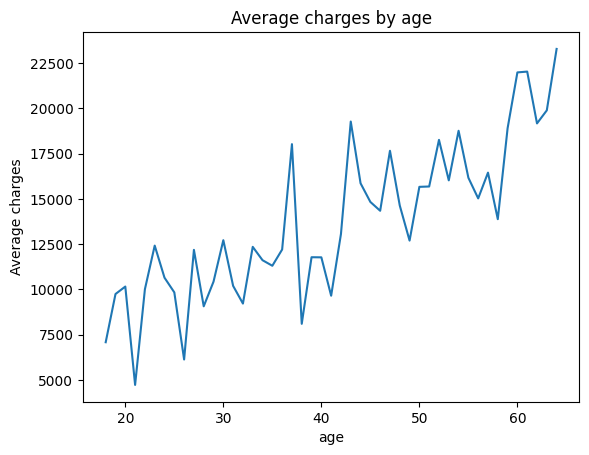

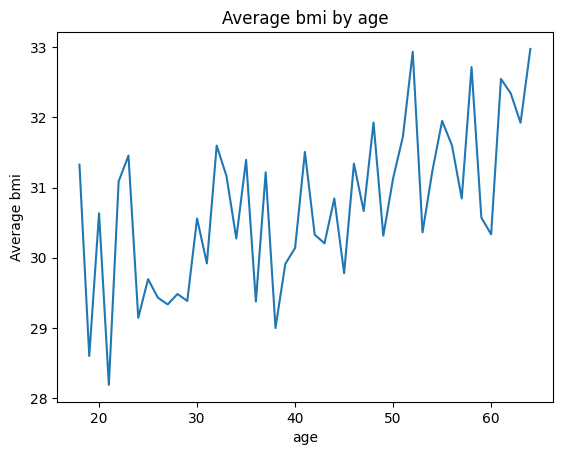

{15: 1694.7964, 16: 4904.00035, 17: 5116.5004, 18: 1728.897, 19: 16776.30405, 20: 8605.3615, 21: 4296.2712, 22: 1964.78, 23: 26926.5144, 24: 6593.5083, 25: 14478.33015, 26: 8399.50006, 27: 37829.7242, 28: 18328.2381, 29: 6059.173, 30: 10600.5483, 31: 10338.9316, 32: 7050.0213, 33: 6343.6630000000005, 34: 34828.654, 35: 2322.6218, 36: 49577.6624, 37: 30063.58055, 38: 23837.0316, 39: 19496.71917, 40: 8733.22925, 41: 3989.841, 42: 40904.1995, 43: 11576.13, 44: 11411.685, 45: 3693.428, 46: 9549.5651, 47: 9748.9106, 48: 9432.9253, 49: 11381.3254, 50: 2438.0552, 52: 44501.3982, 53: 1163.4627}


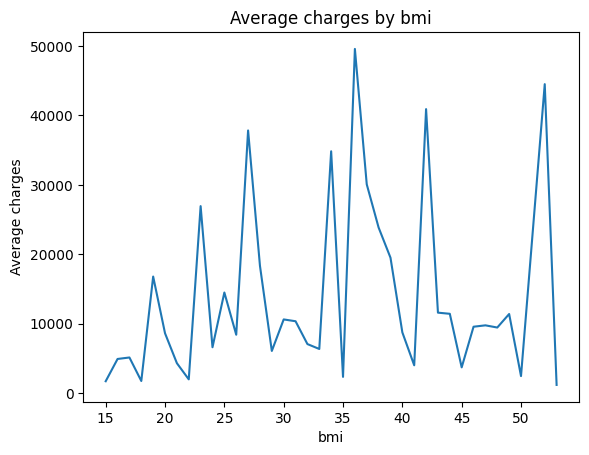

In [192]:
charges_by_age = calculate_average(pacients, 'age', 'charges')
plot_graph_bivariate(charges_by_age, 'age', 'charges')

mbi_by_age = calculate_average(pacients, 'age', 'bmi')
plot_graph_bivariate(mbi_by_age, 'age', 'bmi')

charges_by_bmi = calculate_average(pacients, 'bmi', 'charges')
print(charges_by_bmi)
plot_graph_bivariate(charges_by_bmi, 'bmi', 'charges')

In [193]:
print('pacients charges by sex: \n' + str(calculate_average(pacients, 'sex', 'charges')))

print('\npacients charges by region: \n' + str(calculate_average(pacients, 'region', 'charges', True)))

print('\npacients bmi by region: \n' + str(calculate_average(pacients, 'region', 'bmi', True)))

print('\npacients charges by children: \n' + str(calculate_average(pacients, 'children', 'charges')))

print('\npacients charges by smoker: \n' + str(calculate_average(pacients, 'smoker', 'charges')))

print('\npacients bmi by sex: \n' + str(calculate_average(pacients, 'sex', 'bmi')))

pacients charges by sex: 
{'female': 12569.57884383534, 'male': 13956.751177721886}

pacients charges by region: 
{'southwest': 12346.93737729231, 'northwest': 12417.575373969228, 'northeast': 13406.3845163858, 'southeast': 14735.411437609895}

pacients bmi by region: 
{'northeast': 29.17350308641976, 'northwest': 29.199784615384626, 'southwest': 30.59661538461538, 'southeast': 33.35598901098903}

pacients charges by children: 
{0: 12365.975601635882, 1: 12731.171831635793, 2: 15073.563733958328, 3: 15355.31836681528, 4: 13850.656311199999, 5: 8786.035247222222}

pacients charges by smoker: 
{'no': 8434.268297856199, 'yes': 32050.23183153285}

pacients bmi by sex: 
{'female': 30.377749244713023, 'male': 30.943128698224832}


<h3> Some conclusions on previous analysis </h3>

It's possible to identify some important points in the exploratory analysis:
- Medical charges increase linearly with age, showing a positive correlation
- BMI increase linearly with age, showing a positive correlation
- Genre and charges, its possible to see that male's usually have a higher medical charge
- Charges are higher to people living in southeast (14735) comparing to southwest (12346)
- There's no linear correlation in charges to the number of kids
- Smoking is a high correlation predictor to increase medical charges


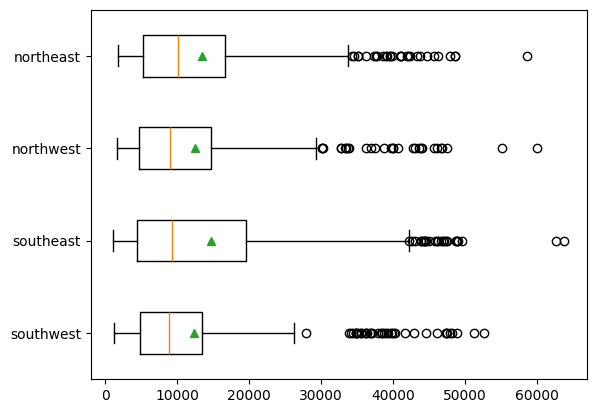

In [194]:
# boxplot for charges by region
plt.boxplot([list(map(float, [pacient['charges'] for pacient in pacients if pacient['region'] == 'southwest'])), 
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['region'] == 'southeast'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['region'] == 'northwest'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['region'] == 'northeast']))], 
            labels=['southwest', 'southeast', 'northwest', 'northeast'], 
            vert=False,
            showmeans=True)

plt.show()


In charges by region its possible to see that the median of all the regions is basically the same, but the mean is deviating the data, with the help of outliers creating the difference between then, in the future, lets analyze the data by region, like BMI or children.

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
{'southwest': {'male': 163, 'female': 162}, 'southeast': {'male': 189, 'female': 175}, 'northwest': {'male': 161, 'female': 164}, 'northeast': {'male': 163, 'female': 161}}
{'southwest': {'male': 0.5015384615384615, 'female': 0.49846153846153846}, 'southeast': {'male': 0.5192307692307693, 'female': 0.4807692307692308}, 'northwest': {'male': 0.49538461538461537, 'female': 0.5046153846153846}, 'northeast': {'male': 0.5030864197530864, 'female': 0.49691358024691357}}
{'southwest': {'yes': 58, 'no': 267}, 'southeast': {'yes': 91, 'no': 273}, 'northwest': {'yes': 58, 'no': 267}, 'northeast': {'yes': 67, 'no': 257}}
{'southwest': {'yes': 0.17846153846153845, 'no': 0.8215384615384616}, 'southeast': {'yes': 0.25, 'no': 0.75}, 'northwest': {'yes': 0.17846153846153845, 'no': 0.8215384615384616}, 'northeast': {'yes': 0.20679012345679013, 'no': 0.7932098765432098}}


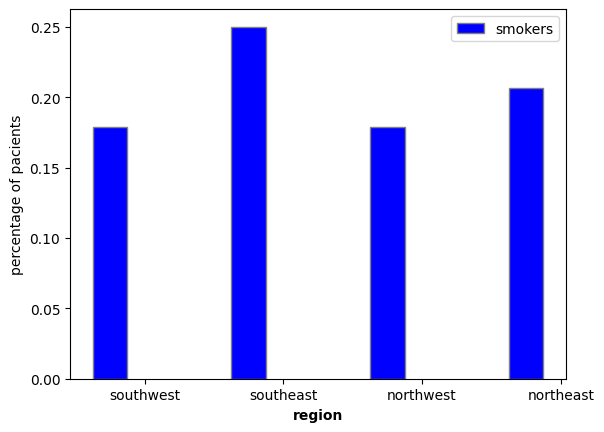

In [195]:
# count the number of pacients by region
pacients_by_region = {}
for pacient in pacients:
    if pacient['region'] in pacients_by_region:
        pacients_by_region[pacient['region']] += 1
    else:
        pacients_by_region[pacient['region']] = 1

print(pacients_by_region)

# count the number of pacients by gender and region
pacients_by_gender_region = {}
for pacient in pacients:
    region = pacient['region']
    gender = pacient['sex']
    if region not in pacients_by_gender_region:
        pacients_by_gender_region[region] = {'male': 0, 'female': 0}
    pacients_by_gender_region[region][gender] += 1

print(pacients_by_gender_region)

# check the percentage of gender by region
for region in pacients_by_gender_region:
    total = pacients_by_gender_region[region]['male'] + pacients_by_gender_region[region]['female']
    pacients_by_gender_region[region]['female'] = pacients_by_gender_region[region]['female'] / total
    pacients_by_gender_region[region]['male'] = pacients_by_gender_region[region]['male'] / total
print(pacients_by_gender_region)

# count the number of pacients by smoker and region
pacients_by_smoker_region = {}
for pacient in pacients:
    region = pacient['region']
    smoker = pacient['smoker']
    if region not in pacients_by_smoker_region:
        pacients_by_smoker_region[region] = {'yes': 0, 'no': 0}
    pacients_by_smoker_region[region][smoker] += 1

print(pacients_by_smoker_region)

# check the percentage of smokers by region
for region in pacients_by_smoker_region:
    total = pacients_by_smoker_region[region]['yes'] + pacients_by_smoker_region[region]['no']
    pacients_by_smoker_region[region]['yes'] = pacients_by_smoker_region[region]['yes'] / total
    pacients_by_smoker_region[region]['no'] = pacients_by_smoker_region[region]['no'] / total

print(pacients_by_smoker_region)

# create a pilled bar chart for the number of pacients that smoke by region
import numpy as np

regions = list(pacients_by_smoker_region.keys())
smokers = [pacients_by_smoker_region[region]['yes'] for region in regions]

barWidth = 0.25
r1 = np.arange(len(smokers))

plt.bar(r1, smokers, color='b', width=barWidth, edgecolor='grey', label='smokers')

plt.xlabel('region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(smokers))], regions)
plt.ylabel('percentage of pacients')
plt.legend()
plt.show()

<h3> Bingo! </h3>
As we can see in the previous analysis, is it possible to see that the regions who have the highest medical costs, southeast and northeast, too have the most percentage of smokers, and southeast has the biggest percentage of man by region, and we saw that mans have a slightely higher medical expenses.

<h3> Checking the variable children </h3>

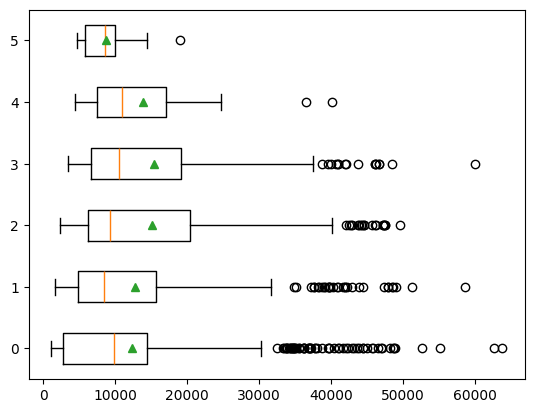

In [196]:

# boxplot for charges by region
plt.boxplot([list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '0'])), 
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '1'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '2'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '3'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '4'])),
             list(map(float, [pacient['charges'] for pacient in pacients if pacient['children'] == '5'])),
             ], 
            labels=['0', '1', '2', '3', '4', '5'], 
            vert=False,
            showmeans=True)

plt.show()

{'0': {'yes': 115, 'no': 459}, '1': {'yes': 61, 'no': 263}, '3': {'yes': 39, 'no': 118}, '2': {'yes': 55, 'no': 185}, '5': {'yes': 1, 'no': 17}, '4': {'yes': 3, 'no': 22}}
{'0': {'yes': 0.20034843205574912, 'no': 0.7996515679442509}, '1': {'yes': 0.1882716049382716, 'no': 0.8117283950617284}, '3': {'yes': 0.2484076433121019, 'no': 0.7515923566878981}, '2': {'yes': 0.22916666666666666, 'no': 0.7708333333333334}, '5': {'yes': 0.05555555555555555, 'no': 0.9444444444444444}, '4': {'yes': 0.12, 'no': 0.88}}
[0.20034843205574912, 0.1882716049382716, 0.2484076433121019, 0.22916666666666666, 0.05555555555555555, 0.12]


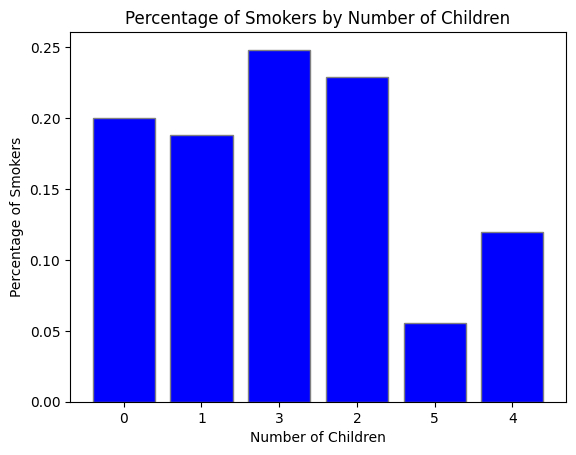

In [197]:
# count the number of smokers by children
smokers_by_children = {}
for pacient in pacients:
    children = pacient['children']
    smoker = pacient['smoker']
    if children not in smokers_by_children:
        smokers_by_children[children] = {'yes': 0, 'no': 0}
    smokers_by_children[children][smoker] += 1

print(smokers_by_children)

# check the percentage of distribution of smokers by children
for children in smokers_by_children:
    total = smokers_by_children[children]['yes'] + smokers_by_children[children]['no']
    smokers_by_children[children]['yes'] = smokers_by_children[children]['yes'] / total
    smokers_by_children[children]['no'] = smokers_by_children[children]['no'] / total

print(smokers_by_children)

# plot the percentage of smokers = 'yes' by number of children
children_labels = list(smokers_by_children.keys())
smokers_percentage = [smokers_by_children[children]['yes'] for children in children_labels]
print(smokers_percentage)
plt.bar(children_labels, smokers_percentage, color='b', edgecolor='grey')
plt.xlabel('Number of Children')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers by Number of Children')
plt.show()

<h3> Bingo² </h3>
Checking the variable number of children is possible to identify, that the results of children by medical costs made previously had no linear correlation.

But checking number of children with the percentage of smokers, we can see a correlation between this variables, which means:

- The population of pacients who have 3 children, are the ones who smokers more by percentage of the population (24% of smokers) and the ones with the higgest medical costs.
- The population with 5 children, are the ones with less percentage of smokers (5% of smokers) and the population with lowest medical costs.